## Feature Engineering

Feature engineering is a process of extracting useful features from raw data using math, statistics and domain knowledge.

### Removing outliers using Percentile
 

In [1]:
import pandas as pd

In [2]:
heights = pd.read_csv('heights.csv')
heights.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


#### Detecting outliers using percentile

In [3]:
maximum_threshold = heights['height'].quantile(0.95)
maximum_threshold

9.689999999999998

In [5]:
heights[heights['height']>maximum_threshold]

,name,height
9,imran,14.5


In [4]:
minimum_threshold = heights['height'].quantile(0.05)
minimum_threshold

3.6050000000000004

In [6]:
heights[heights['height'] < minimum_threshold]

,name,height
12,yoseph,1.2


### To remove the outliers

At this stage, we will be removing values in the height colun that are above the maximum threshold and below the minimum threshold.

In [7]:
cleaned_data = heights[(heights['height'] < maximum_threshold) & (heights['height'] > minimum_threshold)]
cleaned_data

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


Exploring a more complex dataset

In [8]:
bhp = pd.read_csv('bhp.csv')
bhp.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [10]:
bhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [11]:
bhp.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [12]:
bhp.shape

(13200, 7)

In [13]:
minimum_threshold = bhp['price_per_sqft'].quantile(0.001)

In [14]:
maximum_threshold = bhp['price_per_sqft'].quantile(0.999)

In [15]:
bhp[bhp['price_per_sqft'] > maximum_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [16]:
bhp[bhp['price_per_sqft'] < minimum_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


### Removing the outliers

In [17]:
new_bhp = bhp[(bhp['price_per_sqft'] < maximum_threshold) & (bhp['price_per_sqft'] > minimum_threshold)]
new_bhp

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


### Detecting and removing outliers using z-score and standard deviation

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
hg = pd.read_csv('weight-height.csv')

In [53]:
hg.sample(10)

,Gender,Height,Weight
5549,Female,63.217488,135.601006
4941,Male,64.533738,153.583453
45,Male,70.104786,188.922303
2459,Male,70.865815,201.511538
9625,Female,58.032173,92.791450
8266,Female,59.977340,110.800198
4015,Male,65.848246,158.193446
232,Male,76.021347,235.926061
3869,Male,66.324954,166.615538
6261,Female,60.434055,118.481624


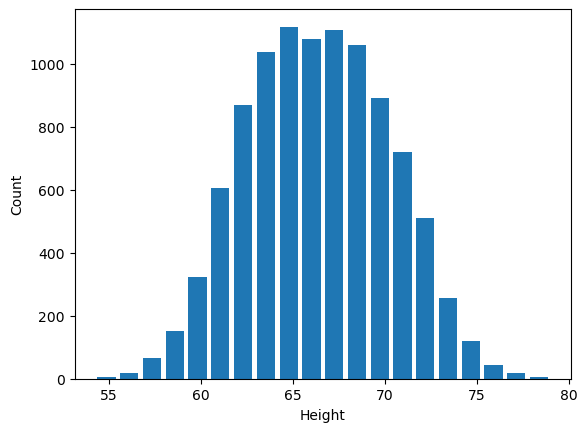

In [54]:
plt.hist(hg['Height'], bins = 20, rwidth = 0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

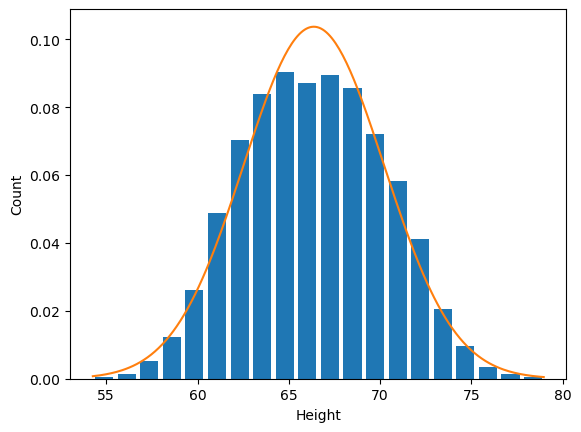

In [55]:
from scipy.stats import norm
import numpy as np
plt.hist(hg['Height'], bins = 20, rwidth = 0.8, density = True)
plt.xlabel('Height')
plt.ylabel('Count')

rng = np.arange(hg['Height'].min(), hg['Height'].max(), 0.1)
plt.plot(rng, norm.pdf(rng, hg['Height'].mean(), hg['Height'].std()))

In [56]:
hg['Height'].mean()

66.36755975482106

In [57]:
hg['Height'].std()

3.8475281207732324

### Outlier detection and removing using 3 standard deviation

In [58]:
upper_limit = hg['Height'].mean() + 3*hg['Height'].std()
upper_limit

77.91014411714076

In [59]:
lower_limit = hg['Height'].mean() - 3*hg['Height'].std()
lower_limit

54.82497539250136

In [60]:
hg[(hg['Height']>upper_limit) | (hg['Height']<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


To remove the outliers and generate new dataframe

In [61]:
hg_no_outlier_std = hg[(hg['Height'] < upper_limit) & (hg['Height'] > lower_limit)]
hg_no_outlier_std.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [62]:
hg['zscore'] = (hg['Height'] - hg['Height'].mean())/hg['Height'].std()
hg.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [63]:
hg[hg['zscore'] > 3]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [64]:
hg[hg['zscore'] < -3]

,Gender,Height,Weight,zscore
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


List of all outliers

In [65]:
hg[(hg['zscore'] < -3) | (hg['zscore'] > 3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


To remove the outliers

In [67]:
hg_no_outlier_zscore = hg[(hg['zscore'] > -3) & (hg['zscore'] < 3)]
hg_no_outlier_zscore

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090
